In [2]:
path = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Fallgruppe_60'
list_of_abnormal = os.listdir(path)
#print(len(list_of_abnormal))   95
print(list_of_abnormal)  # 注意这里的顺序和文件夹里的顺序并不相同！！！！
abnormal_data = {}
abnormal_label = []
for i_case, case_name in enumerate(list_of_abnormal):
    abnormal_data[i_case] = xr.open_dataset(path+ '/' +case_name).to_array(dim='feature').transpose().to_pandas()
    abnormal_label.append(0)

['20150316-232700.nc', '20131219-052800.nc', '20100716-003400.nc', '20140726-215500.nc', '20090922-141000.nc', '20130402-210700.nc', '20150805-091900.nc', '20090505-063000.nc', '20150225-054300.nc', '20150112-061300.nc', '20151029-153100.nc', '20130502-154300.nc', '20131223-022300.nc', '20150601-150900.nc', '20150919-213200.nc', '20140320-235000.nc', '20140913-103400.nc', '20141004-091900.nc', '20151007-031200.nc', '20120727-224800.nc', '20150714-140500.nc', '20130302-235800.nc', '20141219-110900.nc', '20110406-083800.nc', '20120324-061500.nc', '20100505-024100.nc', '20100424-133600.nc', '20141222-110700.nc', '20120304-195600.nc', '20131119-083700.nc', '20131013-020900.nc', '20110622-163900.nc', '20130101-010500.nc', '20110126-222800.nc', '20100629-063600.nc', '20121018-041700.nc', '20150706-055700.nc', '20090718-112500.nc', '20120201-130000.nc', '20120509-003200.nc', '20110511-183300.nc', '20151001-121000.nc', '20121129-210400.nc', '20110503-100300.nc', '20140404-005400.nc', '20101008

In [ ]:
# features for reference:
# 'index-out', 'fhr-out', 'toco-out', 'tocopeak', 'eval', 'eval_detail', 'sig_qual',
# 'corrected', 'baseline', 'base_max', 'floatline', 'accDec', 'dec_class', 'decSum',
# 'accSum','osci_print', 'validFHR', 'rawDeviation', 'minDeviation', 'quantilDev',
# 'sinus', 'osci_class','stv', 'delay', 'eval_stv', 'eval_signalquality', 'eval_dec',
# 'eval_acc', 'eval_var', 'eval_baseline'

In [15]:
abnormal_1 = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Fallgruppe_60/20150316-232700.nc'
abnormal_1_data = xr.open_dataset(abnormal_1).to_array(dim='feature').transpose().to_pandas()
ab_fhr = abnormal_1_data['fhr-out']
n_ab = drop_nan(interpolate_data(replace_0_with_nan(down_sample(ab_fhr))))   # type: <class 'pandas.core.series.Series'>
#print(type(n_ab))
#print(n_ab.shape)
zz = n_ab.iloc[0:1000].values
print(type(zz))
print(zz.shape)
print(len(zz))
ft_data = fourier_transform(zz).reshape((1,-1))[:,:30]
print(ft_data.shape)
xx = np.column_stack((ft_data.real, ft_data.imag))
print(xx)
print(xx.shape)

<class 'numpy.ndarray'>
(1000,)
1000
(1, 30)
[[ 1.33923500e+05  5.81948037e+03 -5.01912491e+03  3.19672196e+03
  -1.74665260e+03  5.94270708e+02 -3.95824641e+03 -9.67083031e+02
   1.06647836e+03 -6.03123168e+02  2.84180627e+03  2.35295471e+03
  -4.79656752e+03  1.56760490e+03 -1.09332421e+03  5.29404167e+02
   1.64920383e+03  3.92859312e+03 -9.78559664e+02  8.77990103e+02
   6.55946277e+02 -4.05052378e+02  1.05910428e+03  1.63833033e+03
  -2.14587111e+03  2.39408761e+03  7.53231909e+02 -5.93069955e+02
   1.54085576e+03  4.80913759e+02  0.00000000e+00  2.95603340e+03
  -8.49317753e+02  2.94664565e+03 -3.51431309e+03 -1.46589258e+02
  -1.29305235e+02  4.19290322e+03  4.26649296e+03  4.57244142e+03
   9.57729374e+02 -8.66386287e+02 -2.52524733e+02  8.44713991e+02
   3.88229132e+02  2.23562046e+03  1.00788813e+03  3.72712080e+02
  -6.60310123e+02 -1.14225662e+02  2.01831210e+03  6.81723594e+02
   6.25017230e+02 -7.27382348e+02  3.64865563e+02 -1.73859113e+03
  -1.44774934e+03 -5.14660018e+

In [12]:
# 不同数据类型的截取方式
# list：e.g.: data = [1,1,1,1,1,1]  data[0:num]
# numpy array: e.g.: data = np.ones((1,6))  同一行，截取特定的列数：data[:,:num]
# pandas.series: e.g.: new_data = data.iloc[0:num].values, type is 'numpy.ndarray'

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import xgboost as xgb

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score

In [3]:
def check_data_info(data):
	# check the overall info of the data, can only be applied to pandas dataframe
	return data.describe()

In [4]:
def check_null_num(data):
	# check the total num of the null value, i.e. NaN
	return data.isnull().sum()

In [5]:
def down_sample(data,start=-1,end=-7200,step=-4):
	#param start: index for the start point
	#param end: index for the end point
	#param step: sample interval
	return data[start:end:step]

In [6]:
def replace_0_with_nan(data):
	data[data==0] = np.nan
	return data

In [7]:
def interpolate_data(data):
	# Note: the interpolation can only be used to interpolate the NaN data
	new_data = data.interpolate()
	return new_data

In [8]:
def drop_nan(data):
	# Note: this step can be used to drop the last few nan values,
	# which original are the last few 0 values
	new_data = data.dropna()
	return new_data

In [9]:
def fourier_transform(data):
	new_data = np.fft.fft(data)
	return new_data

In [10]:
def plot_data(data):
	plt.plot(data)
	plt.show()

In [11]:
def classify(data, label, save=True):
    x_train, x_test, y_train, y_test = train_test_split(data, label)  # target should also be numpy array
    # print(type(x_test)) <class 'numpy.ndarray'>
    # print(type(y_train))
    clf = XGBClassifier()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    if save:
        return clf
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test, y_pred)
    print(f"Accuracy:\n {100* acc:.2f}%")
    print(f"Precision:\n {100* prec:.2f}%")

In [12]:
dec_class_data = pd.read_csv('/Users/zoe/Desktop/CACOM/total_labeled_dec.csv')
#print(dec_class_data)
ab_dec_data =  dec_class_data[dec_class_data['acidose']==1] # type(ab_dec_data):pandas frame ;len(ab_dec_data): 86
nor_dec_data = dec_class_data[dec_class_data['acidose']==0]
print(type(ab_dec_data))
print(len(ab_dec_data))

<class 'pandas.core.frame.DataFrame'>
86


In [13]:
ff = ab_dec_data.values[:,:-1] # drop the last acidose label
print(type(ff))
#print(ff)
print(ff.shape)

<class 'numpy.ndarray'>
(86, 7)


In [14]:
all_data_dec = np.concatenate((ab_dec_data.values[:,:-1], nor_dec_data.values[:,:-1]), axis=0)
all_label_dec = np.concatenate((np.zeros((len(ab_dec_data),1)), np.ones((len(nor_dec_data),1))), axis=0)
# shuffle the index
dec_index = [i for i in range(len(ab_dec_data)+len(nor_dec_data))]
random.shuffle(dec_index)
shuffled_dec_data = all_data_dec[dec_index]
shuffled_dec_label = all_label_dec[dec_index].ravel()
model = classify(shuffled_dec_data, shuffled_dec_label)

<class 'numpy.ndarray'>


In [24]:
y_pred = model.predict(shuffled_dec_data)
acc = accuracy_score(shuffled_dec_label,y_pred)
prec = precision_score(shuffled_dec_label, y_pred)
print(f"Accuracy:\n {100* acc:.2f}%")
print(f"Precision:\n {100* prec:.2f}%")

Accuracy:
 91.15%
Precision:
 91.94%


In [15]:
model.save_model('dec_model')

In [16]:
bst = xgb.Booster({'nthread':4}) # init model
bst.load_model('dec_model') # load data

In [23]:
dtest = xgb.DMatrix(shuffled_dec_data)
y_pred = bst.predict(dtest)
acc = accuracy_score(shuffled_dec_label,y_pred.round())
prec = precision_score(shuffled_dec_label, y_pred.round())
print(f"Accuracy:\n {100* acc:.2f}%")
print(f"Precision:\n {100* prec:.2f}%")

0.9114832535885168
0.9193548387096774


In [29]:
def load_all_data(path):
    # load handpicked feature data from path
    # pre-fixed parameter
    num_point = 1000 # only 1000 valid data points from the last second of the whole data set are utilized, this parameter can be changed later
    num_ft = 30 # only the first 30 items of outcomes of the fourier transform are utilized, this parameter can be changed later
    case_list = os.listdir(path)
    data_fhr = np.zeros((len(case_list),num_point))
    data_baseline = np.zeros((len(case_list),num_point))
    data_floatline = np.zeros((len(case_list),num_point))
    data_stv = np.zeros((len(case_list),num_point))
    ft_fhr = np.zeros((len(case_list),num_ft*2)) # since we need both real and imag part, so the col num should be doubled
    ft_baseline = np.zeros((len(case_list),num_ft*2))
    ft_floatline = np.zeros((len(case_list),num_ft*2))
    ft_stv = np.zeros((len(case_list),num_ft*2))
    num_fhr_case = 0
    num_baseline_case = 0
    num_floatline_case = 0
    num_stv_case = 0
    for i_case, case_name in enumerate(case_list):
        raw_data = xr.open_dataset(path + '/' + case_name).to_array(dim='feature').transpose().to_pandas()
        # one row := one sample
        raw_data_fhr = raw_data['fhr-out']
        # after drop_nan function, data type: <class 'pandas.core.series.Series'>, 
        # so we need to process the data using .iloc[].values, now the data type should be numpy array
        new_data_fhr = drop_nan(interpolate_data(replace_0_with_nan(down_sample(raw_data_fhr)))).iloc[0:num_point].values
        raw_data_baseline = raw_data['baseline']
        new_data_baseline = drop_nan(interpolate_data(replace_0_with_nan(down_sample(raw_data_baseline)))).iloc[0:num_point].values
        raw_data_floatline = raw_data['floatline']
        new_data_floatline = drop_nan(interpolate_data(replace_0_with_nan(down_sample(raw_data_floatline)))).iloc[0:num_point].values
        raw_data_stv = raw_data['stv']
        new_data_stv = drop_nan(interpolate_data(replace_0_with_nan(down_sample(raw_data_stv)))).iloc[0:num_point].values
        if len(new_data_fhr) == 1000:
            data_fhr[i_case,:] = new_data_fhr
            ft_data = fourier_transform(new_data_fhr).reshape((1,-1))[:,:num_ft]
            ft_fhr[i_case,:] = np.column_stack((ft_data.real, ft_data.imag))
            num_fhr_case += 1
        if len(new_data_baseline) == 1000:
            data_baseline[i_case,:] = new_data_baseline
            ft_data = fourier_transform(new_data_baseline).reshape((1,-1))[:,:num_ft]
            ft_baseline[i_case,:] = np.column_stack((ft_data.real, ft_data.imag))
            num_baseline_case += 1
        if len(new_data_floatline) == 1000:
            data_floatline[i_case,:] = new_data_floatline
            ft_data = fourier_transform(new_data_floatline).reshape((1,-1))[:,:num_ft]
            ft_floatline[i_case,:] = np.column_stack((ft_data.real, ft_data.imag))
            num_floatline_case += 1
        if len(new_data_stv) == 1000:
            data_stv[i_case,:] = new_data_stv
            ft_data = fourier_transform(new_data_stv).reshape((1,-1))[:,:num_ft]
            ft_stv[i_case,:] = np.column_stack((ft_data.real, ft_data.imag))
            num_stv_case += 1
    return data_fhr[:num_fhr_case,:], ft_fhr[:num_fhr_case,:], data_baseline[:num_baseline_case,:], ft_baseline[:num_baseline_case,:], data_floatline[:num_floatline_case,:], ft_floatline[:num_floatline_case,:], data_stv[:num_stv_case,:], ft_stv[:num_stv_case,:]

In [31]:
abnormal_path = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Fallgruppe_60'
ab_fhr, ab_fhr_ft, ab_baseline, ab_baseline_ft, ab_floatline, ab_floatline_ft, ab_stv, ab_stv_ft = load_all_data(abnormal_path)
# abnormal_case_num:90; type(ab_fhr): numpy array, shape:(90, 1000); type(ab_fhr_ft): numpy array, shape:(90, 60)

In [43]:
test = pd.DataFrame(data = ab_fhr[0])
check_data_info(test)

,0
count,1000.000000
mean,133.923500
std,24.864190
min,57.000000
25%,118.000000
50%,142.000000
75%,152.745455
max,177.000000


In [46]:
#folder_path = os.getcwd()
#print('save file to path:' % folder_path)
np.savetxt("ab_fhr.csv", ab_fhr, delimiter=",")

(90, 1000)


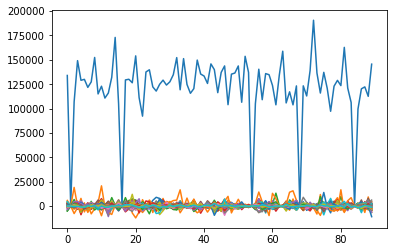

(90, 60)


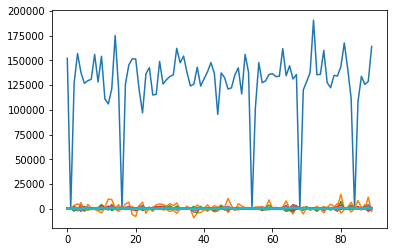

(90, 60)


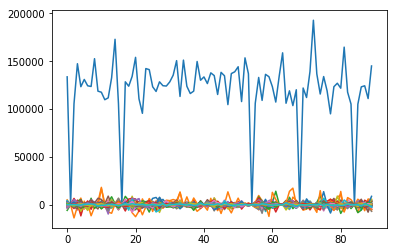

(90, 60)


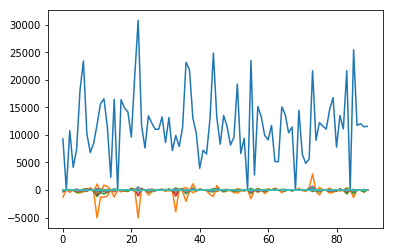

In [34]:
print(ab_fhr_ft.shape)
plot_data(ab_fhr_ft)
print(ab_baseline_ft.shape)
plot_data(ab_baseline_ft)
print(ab_floatline_ft.shape)
plot_data(ab_floatline_ft)
print(ab_stv_ft.shape)
plot_data(ab_stv_ft)

In [21]:
normal_path = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Kontrollgruppe_60'
nor_fhr, nor_baseline, nor_floatline, nor_stv = load_all_data(normal_path)
# normal_case_num: 811; type(normal_data): numpy array, shape:(811, 60)

(779, 60)


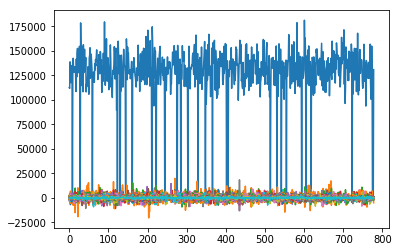

(795, 60)


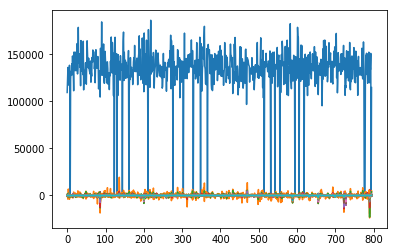

(795, 60)


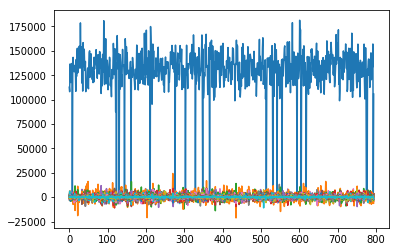

(795, 60)


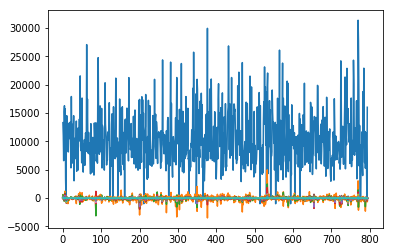

In [23]:
print(nor_fhr.shape)
plot_data(nor_fhr)
print(nor_baseline.shape)
plot_data(nor_baseline)
print(nor_floatline.shape)
plot_data(nor_floatline)
print(nor_stv.shape)
plot_data(nor_stv)

In [25]:
all_data_fhr = np.concatenate((ab_fhr_ft, nor_fhr_ft), axis=0)
all_label_fhr = np.concatenate((np.zeros((len(ab_fhr_ft),1)), np.ones((len(nor_fhr_ft),1))), axis=0)
# shuffle the index
fhr_index = [i for i in range(len(ab_fhr_ft)+len(nor_fhr_ft))]
random.shuffle(fhr_index)
shuffled_fhr_data = all_data_fhr[fhr_index]
shuffled_fhr_label = all_label_fhr[fhr_index].ravel()
model = classify(shuffled_fhr_data, shuffled_fhr_label)
# model.save_model('fhr_model')

Accuracy:
 93.58%
Precision:
 94.01%


In [26]:
all_data_baseline = np.concatenate((ab_baseline_ft, nor_baseline_ft), axis=0)
all_label_baseline = np.concatenate((np.zeros((len(ab_baseline_ft),1)), np.ones((len(nor_baseline_ft),1))), axis=0)
# shuffle the index
baseline_index = [i for i in range(len(ab_baseline_ft)+len(nor_baseline_ft))]
random.shuffle(baseline_index)
shuffled_baseline_data = all_data_baseline[baseline_index]
shuffled_baseline_label = all_label_baseline[baseline_index].ravel()
model = classify(shuffled_baseline_data, shuffled_baseline_label)
#model.save_model('baseline_model')

Accuracy:
 90.09%
Precision:
 90.91%


In [27]:
all_data_floatline = np.concatenate((ab_floatline_ft, nor_floatline_ft), axis=0)
all_label_floatline = np.concatenate((np.zeros((len(ab_floatline_ft),1)), np.ones((len(nor_floatline_ft),1))), axis=0)
# shuffle the index
floatline_index = [i for i in range(len(ab_floatline_ft)+len(nor_floatline_ft))]
random.shuffle(floatline_index)
shuffled_floatline_data = all_data_floatline[floatline_index]
shuffled_floatline_label = all_label_floatline[floatline_index].ravel()
model = classify(shuffled_floatline_data, shuffled_floatline_label)
#model.save_model('floatline_model')

Accuracy:
 91.89%
Precision:
 91.89%


In [28]:
all_data_stv = np.concatenate((ab_stv_ft, nor_stv_ft), axis=0)
all_label_stv = np.concatenate((np.zeros((len(ab_stv_ft),1)), np.ones((len(nor_stv_ft),1))), axis=0)
# shuffle the index
stv_index = [i for i in range(len(ab_stv_ft)+len(nor_stv_ft))]
random.shuffle(stv_index)
shuffled_stv_data = all_data_stv[stv_index]
shuffled_stv_label = all_label_stv[stv_index].ravel()
model = classify(shuffled_stv_data, shuffled_stv_label)
#model.save_model('stv_model')

Accuracy:
 91.89%
Precision:
 92.31%


In [ ]:
####################### example for one case

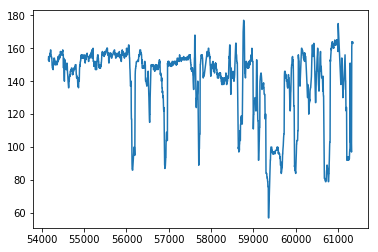

(30, 1)
<class 'numpy.ndarray'>
(22, 1)
<class 'numpy.ndarray'>
Accuracy:
 100.00%
Precision:
 0.00%


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
abnormal_1 = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Fallgruppe_60/20150316-232700.nc'
abnormal_1_data = xr.open_dataset(abnormal_1).to_array(dim='feature').transpose().to_pandas()
ab_fhr = abnormal_1_data['fhr-out']
n_ab = drop_nan(interpolate_data(replace_0_with_nan(down_sample(ab_fhr))))
plot_data(n_ab)
check_data_info(n_ab)
nn_ab = n_ab,1000
ft_ab = fourier_transform(nn_ab)
#print(ft_ab)
#print(ft_ab.real)
complex_ft_ab = truncate_data(ft_ab,30)  # type: numpy array
complex_ft_ab = np.reshape(complex_ft_ab,(len(complex_ft_ab),-1))
#print(complex_ft_ab.shape)
#plot_data(truncate_data(ft_ab,30))
#y = np.zeros((30,1))
#classify(complex_ft_ab,y)

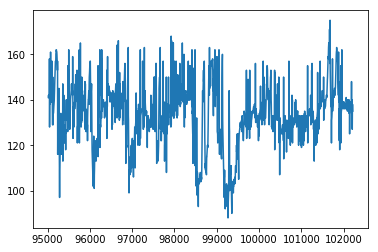

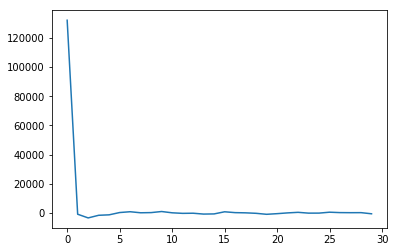

In [54]:
normal_1 = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Kontrollgruppe_60/20090211-013700.nc'
normal_1_data = xr.open_dataset(normal_1).to_array(dim='feature').transpose().to_pandas()
nor_fhr = normal_1_data['fhr-out']
n_nor = drop_nan(interpolate_data(replace_0_with_nan(down_sample(nor_fhr))))
plot_data(n_nor)
check_data_info(n_nor)
nn_nor = truncate_data(n_nor,1000)
ft_nor = fourier_transform(nn_nor)
plot_data(truncate_data(ft_nor,30))

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import copy
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix


def check_data_info(data):
	# check the overall info of the data, can only be applied to pandas dataframe
	return data.describe()

def down_sample(data,start=-1,end=-7200,step=-4):
	#param start: index for the start point
	#param end: index for the end point
	#param step: sample interval
	return data[start:end:step]

def replace_0_with_nan(data):
	data[data==0] = np.nan
	return data

def interpolate_data(data):
	# Note: the interpolation can only be used to interpolate the NaN data
	new_data = data.interpolate()
	return new_data

def drop_nan(data):
	# Note: this step can be used to drop the last few nan values,
	# which original are the last few 0 values
	new_data = data.dropna()
	return new_data

def fourier_transform(data):
	new_data = np.fft.fft(data)
	return new_data

def plot_data(data):
	plt.plot(data)
	plt.show()

def load_all_data(path):
	# load handpicked feature data from path
	# pre-fixed parameter
	num_point = 1000 # only 1000 valid data points from the last second of the whole data set are utilized, this parameter can be changed later
	num_ft = 30 # only the first 30 items of outcomes of the fourier transform are utilized, this parameter can be changed later
	case_list = os.listdir(path)   #<class 'list'>
	case_list_copy = case_list
	case_list_copy = case_list_copy[0:95]
	data_baseline = np.zeros((len(case_list),num_point))
	ft_baseline = np.zeros((len(case_list),num_ft*2))
	num_baseline_case = 0
	for i_case, case_name in enumerate(case_list_copy):
		raw_data = xr.open_dataset(path + '/' + case_name).to_array(dim='feature').transpose().to_pandas()
		# one row := one sample
		raw_data_baseline = raw_data['baseline']
		new_data_baseline = drop_nan(interpolate_data(replace_0_with_nan(down_sample(raw_data_baseline)))).iloc[0:num_point].values
		if len(new_data_baseline) == 1000:
			data_baseline[i_case,:] = new_data_baseline
			ft_data = fourier_transform(new_data_baseline).reshape((1,-1))[:,:num_ft]
			ft_baseline[i_case,:] = np.column_stack((ft_data.real, ft_data.imag))
			num_baseline_case += 1
	return data_baseline[:num_baseline_case,:], ft_baseline[:num_baseline_case,:]

"""load the data"""
abnormal_path = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Fallgruppe_60'
ab_baseline, ab_baseline_ft = load_all_data(abnormal_path)
normal_path = '/Users/zoe/Desktop/CACOM/20190121 DECFIT analysed test data_JG/data/train/Kontrollgruppe_60'
nor_baseline, nor_baseline_ft  = load_all_data(normal_path)

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import copy
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits import mplot3d
from sklearn.svm import SVC


def classify(data, label, save=True):
    num_fold = 0
    num_of_splits = 5
    fold_data = np.zeros((num_of_splits, 90))
    x_train, x_test, y_train, y_test = train_test_split(data, label)
    folds = KFold(n_splits=num_of_splits, shuffle=True)
    for train_idx, test_idx in folds.split(x_train,y_train): # len(train_idx: 72 len(test_idx):18   <class 'numpy.ndarray'>
        train_copy = copy.deepcopy(train_idx)
        test_copy = copy.deepcopy(test_idx)
        fold_data[num_fold,:] = np.concatenate((train_copy, test_copy), axis=0)
        x_train_stra, x_test_stra = x_train[train_idx,:], x_train[test_idx,:]
        y_train_stra, y_test_stra = y_train[train_idx], y_train[test_idx]
        print()
        print("Fold:", num_fold)
        print()
        #### xgboost
        print("------xgboost------")
        clf = XGBClassifier()
        clf.fit(x_train_stra,y_train_stra)
        y_pred = clf.predict(x_test_stra)
        acc = accuracy_score(y_test_stra,y_pred)
        prec = precision_score(y_test_stra, y_pred)
        re = recall_score(y_test_stra,y_pred)
        cm = confusion_matrix(y_test_stra,y_pred)
        print(f"Accuracy:\n {100* acc:.2f}%")
        print(f"Precision:\n {100* prec:.2f}%")
        print(f"Recall:\n {100* re:.2f}%")
        #print("confusion_matrix:")
        #print(cm)
        #### svm
        #print("------svm------")
        #svm = SVC(gamma='scale')
        #svm.fit(x_train_stra,y_train_stra)
        #y_pred_svm = svm.predict(x_test_stra)
        #acc_svm = accuracy_score(y_test_stra,y_pred_svm)
        #prec_svm = precision_score(y_test_stra, y_pred_svm)
        #re_svm = recall_score(y_test_stra,y_pred_svm)
        #cm_svm = confusion_matrix(y_test_stra,y_pred_svm)
        #print(f"Accuracy_svm:\n {100* acc_svm:.2f}%")
        #print(f"Precision_svm:\n {100* prec_svm:.2f}%")
        #print(f"Recall_svm:\n {100* re_svm:.2f}%")
        #print("confusion_matrix_svm:")
        #print(cm_svm)
        ######
        num_fold = num_fold + 1
    if save:
        return clf, fold_data

In [11]:
print(ab_baseline.shape)
print(ab_baseline_ft.shape)
print(nor_baseline.shape)
print(nor_baseline_ft.shape)

(90, 1000)
(90, 60)
(94, 1000)
(94, 60)


In [12]:
nor_baseline_ft_cut = nor_baseline_ft[:60,:]
ab_baseline_ft_cut = ab_baseline_ft[:60,:]
nor_baseline_ft_test = nor_baseline_ft[60:90,:]
ab_baseline_ft_test = ab_baseline_ft[60:90,:]

In [13]:
print(ab_baseline_ft_cut.shape)
print(nor_baseline_ft_test.shape)

(60, 60)
(30, 60)


In [15]:
all_data_baseline = np.concatenate((ab_baseline_ft_cut, nor_baseline_ft_cut), axis=0)
all_label_baseline = np.concatenate((np.ones((len(ab_baseline_ft_cut),1)), np.zeros((len(nor_baseline_ft_cut),1))), axis=0).ravel()
# shuffle the index
#baseline_index = [i for i in range(len(ab_baseline_ft_cut)+len(nor_baseline_ft_cut))]
#np.savetxt("shuffled_baseline_data.csv", shuffled_baseline_data, delimiter=",")
#np.savetxt("shuffled_baseline_label.csv", shuffled_baseline_label, delimiter=",")
model, fold_data = classify(all_data_baseline, all_label_baseline)
model.save_model('baseline_model')


Fold: 0

------xgboost------
Accuracy:
 50.00%
Precision:
 80.00%
Recall:
 33.33%

Fold: 1

------xgboost------
Accuracy:
 61.11%
Precision:
 63.64%
Recall:
 70.00%

Fold: 2

------xgboost------
Accuracy:
 50.00%
Precision:
 50.00%
Recall:
 66.67%

Fold: 3

------xgboost------
Accuracy:
 72.22%
Precision:
 77.78%
Recall:
 70.00%

Fold: 4

------xgboost------
Accuracy:
 72.22%
Precision:
 54.55%
Recall:
 100.00%


In [18]:
baseline_model = xgb.Booster({'nthread':4}) # init model
baseline_model.load_model('baseline_model') # load model data

In [19]:
test = np.concatenate((ab_baseline_ft_test, nor_baseline_ft_test), axis=0)
test_label = np.concatenate((np.ones((len(ab_baseline_ft_test),1)), np.zeros((len(nor_baseline_ft_test),1))), axis=0)
test_index = [i for i in range(len(ab_baseline_ft_test)+len(nor_baseline_ft_test))]
random.shuffle(test_index)
shuffled_test_data = test[test_index]
shuffled_test_label = test_label[test_index].ravel()

In [20]:
dtest = xgb.DMatrix(shuffled_test_data)
label_pred = baseline_model.predict(dtest)
acc = accuracy_score(shuffled_test_label,label_pred.round())
prec = precision_score(shuffled_test_label, label_pred.round())
re = recall_score(shuffled_test_label, label_pred.round())
cm = confusion_matrix(shuffled_test_label, label_pred.round())
print(f"Accuracy:\n {100* acc:.2f}%")
print(f"Precision:\n {100* prec:.2f}%")
print(f"Recall:\n {100* re:.2f}%")
#print("confusion_matrix:")
#print(cm)

Accuracy:
 71.67%
Precision:
 67.57%
Recall:
 83.33%
